# Maximizing Model Accuracy for Predicting Forest Fires

<p style="text-align:center;">
  <img src="https://images.unsplash.com/photo-1613858636109-354616495373?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80" width="800" height="100">
  <br>
  Source: <a href="https://unsplash.com/">Unsplash</a>
</p>


Forest fires are one of the most significant environmental hazards that pose a threat to both nature and human life. Accurately predicting forest fires can help prevent their occurrence and minimize the damage they cause. In this project, we take a unique approach to predicting forest fire damage. Instead of relying on a single model, we start with a reference model and apply various techniques such as handling outliers, performing k-fold cross-validation, using regularization, and others, to optimize its accuracy. Our reference model is a standard linear regression model, and our task is to predict the extent of fire damage to a forest. To achieve this, we use data from the [Forest Fires ](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) dataset available in the UCI Machine Learning Repository. This dataset contains information on fires, meteorological data, and the resulting damage. By analyzing this data, we aim to determine how specific characteristics can be useful in accurately predicting future forest fire damage. With the help of machine learning techniques, we can take a step forward in preventing the spread of forest fires and minimizing their adverse effects.


## Import Libraries and Load Data

To start, we need to import the necessary libraries and load the dataset.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [25]:
# Read in the dataset (exclude first column 'Unnamed: 0')
fires = pd.read_csv('fires.csv', index_col=0)

# Reset the index to start from 0
fires = fires.reset_index(drop=True)

## Explore Data

Let's explore the data by looking at the first 30 rows of `fires` dataset.

In [26]:
fires.head(30)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40.0,4.0,0.0,0.0


The `fires` dataset contains information about forest fires. Here is a description of the columns in the dataset:

- `X` - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- `Y` - y-axis spatial coordinate within the Montesinho park map: 2 to 9
- `month` - month of the year: 'jan' to 'dec'
- `day` - day of the week: 'mon' to 'sun'
- `FFMC` - FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20 (Higher values = lower ignition risk, lower values = higher ignition risk).
- `DMC` - DMC (Duff Moisture Code) index from the FWI system: 1.1 to 291.3 (Indicator of loosely compacted organic layer moisture content that signifies fuel consumption potential in forests).
- `DC` - DC (Drought Code) index from the FWI system: 7.9 to 860.6 (Indicates moisture level of deep soil organic layers).
- `ISI` - ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10 (Measures fire spread rate).
- `temp` - temperature in Celsius degrees: 2.2 to 33.30
- `RH` - relative humidity in %: 15.0 to 100
- `wind` - wind speed in km/h: 0.40 to 9.40
- `rain` - outside rain in mm/m2 : 0.0 to 6.4
- `area` - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

In the next step, let's examine the data type and missing values in each column of the dataset.

In [27]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    469 non-null    float64
 5   DMC     496 non-null    float64
 6   DC      474 non-null    float64
 7   ISI     515 non-null    float64
 8   temp    496 non-null    float64
 9   RH      487 non-null    float64
 10  wind    482 non-null    float64
 11  rain    485 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


Based on the information provided, the `fires` dataset has 517 entries and 13 columns. Two columns (`month` and `day`) have object data type while the rest are either float64 or int64. The number of non-null values in each column varies, with some columns having missing values. Specifically, the `FFMC` column has 48 missing values, the `DMC` column has 21 missing values, the `DC` column has 43 missing values, the `ISI` column has 2 missing values, the `temp` column has 21 missing values, the `RH` column has 30 missing values, the `wind` column has 35 missing values, and the `rain` column has 32 missing values. The `area` column has no missing values.

Our next step is to identify the outcome of interest and the features we will use in the reference model. The `area` column represents the total area damaged by the fire and will be our outcome of interest. Additionally, we will only use `temp` and `wind` as features in the reference model, so we should keep that in mind for later.

In [28]:
# Extract columns for the reference model
fires_reference = fires[['temp', 'wind', 'area']].dropna()

# Create reference features X
reference_X = fires_reference[['temp', 'wind']]

# Instantiate linear regression model for reference
reference_lr = LinearRegression()

## Data Processing

As we have discussed the `fires` data above, we may have noticed that there is a considerable amount of missing data. Before we proceed with any model building or fitting, we should address the missing data first. It's tempting to rush through the data cleaning step, but we should emphasize the importance of understanding the data and properly processing it.

Often, the data we have on hand is the only thing we'll get, so we have to make the most of it. The more thoroughly we clean the data, the less frustration we'll experience when we actually perform the modeling. The `fires` data also contains some date information in the `month` and `day` variables, which are currently strings. Therefore, we need to process them into numerical data before we can use them in a model.

Let's start by examining the distribution of the `area` column and then determine if any transformations are necessary.

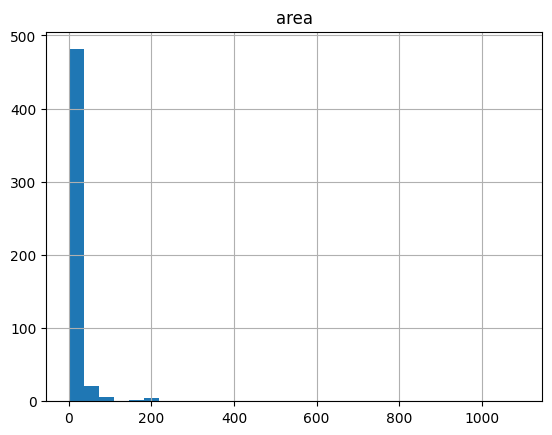

In [29]:
# Make copy of the dataset
fires_clean = fires.copy()

# Visualize the distribution of 'area'
fires_clean.hist('area', bins=30)
plt.show()

The outcome column `area` varies from 0.00-1090, with a majority of values being 0.00, it may be a good idea to transform the data using a suitable method such as log transformation to reduce the effect of extreme values and make the distribution more symmetric. This can help to improve the performance of the models and ensure that the extreme values do not dominate the analysis.

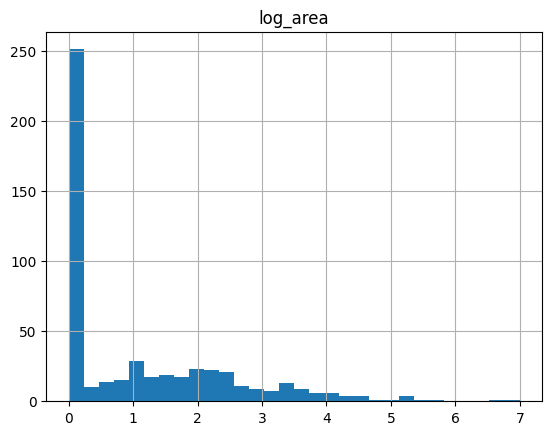

In [30]:
# Apply log transformation to the 'area'
fires_clean['log_area'] = np.log(fires_clean['area'] + 1) # add 1 to avoid taking the log of 0 or negative values

# Drop 'area'
fires_clean.drop('area', axis=1, inplace=True)

# Visualize the distribution of 'area' after log transformation
fires_clean.hist('log_area', bins=30)
plt.show()

We observe that applying a log-transformation does not result in a normal distribution, but it does increase the spread of the data compared to the non-transformed data. This suggests that the majority of fires may not significantly harm the forest, and it would be unwise to exclude all such instances from the analysis.

Next, we will create a new feature called `summer` by deriving it from the `month` column. This feature will have a value of 1 when the fire occurred during summer months (jun, jul, aug), which are typically hotter and more prone to fires.

In [31]:
# Assign 1 to summer months otherwise assign 0
fires_clean['summer'] = fires_clean['month'].apply(lambda x: 1 if x in ['jun', 'jul', 'aug'] else 0)

# View results
fires_clean[['month', 'summer']].sample(20, random_state=0)

,month,summer
213,mar,0
435,jul,1
343,sep,0
230,sep,0
171,aug,1
15,sep,0
162,mar,0
489,aug,1
381,aug,1
96,feb,0


It's possible that the `day` column could provide some predictive power for the `log_area` column, particularly if there are certain days of the week that are associated with more or fewer fires, or fires of greater or lesser severity. One option would be to one-hot encode the `day` column, which would create binary indicator columns for each day of the week. This would allow a machine learning model to potentially capture any patterns or correlations between the day of the week and the `log_area` values. However, if there is no strong reason to suspect that the day of the week is related to the size of the fire, it might be simpler to just drop the column and focus on other features.

In [32]:
# One-hot encode the 'day' column
day_dummies = pd.get_dummies(fires_clean['day'], prefix='day')

# Concatenate the original dataset with the one-hot encoded 'day' column
fires_clean = pd.concat([fires_clean, day_dummies], axis=1)

After successful transformation of the `month` and `day` columns, we can safely drop them from the `fires_clean` dataframe.

In [33]:
# Drop the original 'month' and 'day' columns
fires_clean.drop(columns=['month', 'day'], axis=1, inplace=True)
fires_clean

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area,summer,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.000000,0,1,0,0,0,0,0,0
1,7,4,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.000000,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.000000,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.000000,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.000000,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,2.006871,1,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,4.012592,1,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,2.498152,1,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.000000,1,0,0,1,0,0,0,0


Let's take a look again at the columns that contain missing values.

In [34]:
fires_clean.isnull().sum()

X            0
Y            0
FFMC        48
DMC         21
DC          43
ISI          2
temp        21
RH          30
wind        35
rain        32
log_area     0
summer       0
day_fri      0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
dtype: int64

Imputing missing values is a common data preprocessing step in machine learning. One of the reasons we want to impute missing values is to have a complete set of data to work with, especially when we have a limited amount of data. In this case, we want to use sequential feature selection, which requires complete data.

There are several methods for imputing missing values, such as mean imputation and median imputation. However, we decided to use K-nearest neighbors (KNN) imputation. KNN imputation works by replacing missing values with values from other similar data points based on their distances in the feature space. We chose KNN imputation because we expect the area damage of a fire to be similar among similar fires. Therefore, we can use the information from other similar fires to estimate the missing values.

By imputing missing values using KNN imputation, we can have the biggest set to choose from for sequential feature selection, which can improve the performance of our machine learning models.

In [35]:
from sklearn.impute import KNNImputer

# Access column names containing missing values
miss_val_cols = fires_clean.columns[fires_clean.isnull().any()].tolist()

# Instantiate imputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=3) # n_neighbors=3 since we have small dataset

# Apply imputer and create dataframe
imputed_df = pd.DataFrame(imputer.fit_transform(fires_clean[miss_val_cols]),
                          columns=miss_val_cols)

# Check missing values after imputation
imputed_df.isnull().sum()

FFMC    0
DMC     0
DC      0
ISI     0
temp    0
RH      0
wind    0
rain    0
dtype: int64

Let's explore the dataset for any possible outliers within the features of `imputed_df`.

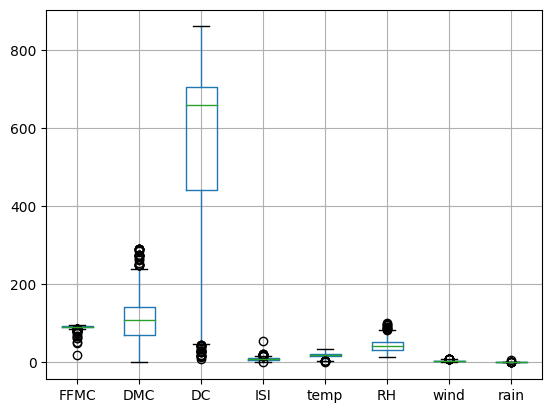

In [36]:
imputed_df.boxplot()
plt.show()

There are some points in the dataset that are significantly different from most of the other points, which are represented as dots in the visualization. We should investigate these points further to determine if they are outliers. We can start by counting the number of outliers in each column *according to the boxplot method*.

In [37]:
for col in miss_val_cols:
    q1 = np.percentile(fires_clean[col], 25)
    q3 = np.percentile(fires_clean[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = ((fires_clean[col] < lower_bound) | (fires_clean[col] > upper_bound)).sum()
    print(f'{col}: {outliers} outliers')

FFMC: 0 outliers
DMC: 0 outliers
DC: 0 outliers
ISI: 0 outliers
temp: 0 outliers
RH: 0 outliers
wind: 0 outliers
rain: 0 outliers


Based on the calculations, there are no outliers in the dataset even though the boxplots may suggest otherwise. Therefore, we will not make any changes to the dataset at this time.

Now that we have inspected the dataset for missing values and outliers, we can proceed to standardize it. This will help us with standardization. After that, we will add the `summer` feature and the one-hot encoded `day` feature back into the dataset.

We'll use `StandardScaler` to scale the features in the dataset to have a mean of 0 and a standard deviation of 1. This scaling is particularly important when dealing with features that have different units of measurement or scales, as it can prevent some features from dominating others in the modeling process. The scaling is performed by subtracting the mean of each feature from its values and then dividing by its standard deviation. This results in the transformed features having a similar scale and variance, making it easier for the model to learn the relationships between the features and the target variable.

In [38]:
from sklearn.preprocessing import StandardScaler

# Instantiate scaler
scaler = StandardScaler()

# Apply scaler
scaled_imputed_df = scaler.fit_transform(imputed_df)

# Create dataframe from 'scaled_imputed_df'
scaled_imputed_df = pd.DataFrame(scaled_imputed_df, columns=miss_val_cols)

# Get columns in 'fires_clean' that are not in 'miss_val_cols'
non_miss_val_cols = fires_clean.columns[~fires_clean.columns.isin(miss_val_cols)]

# Concat 'fires_clean' and 'scaled_imputed_df'
fires_final = pd.concat([fires_clean[non_miss_val_cols], scaled_imputed_df], axis=1)
fires_final.head()

,X,Y,log_area,summer,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,0.0,0,1,0,0,0,0,0,0,-0.812283,-1.335942,-1.846711,-0.860187,-0.398187,0.418726,1.514159,-0.073268
1,7,4,0.0,0,0,0,0,0,0,1,0,-0.010735,-0.859009,0.509582,-0.508736,-0.155493,-0.715565,-1.761003,-0.073268
2,7,4,0.0,0,0,0,1,0,0,0,0,-0.010735,-1.059878,-0.303178,-0.508736,-0.744894,-0.715565,-1.535130,-0.073268
3,8,6,0.0,0,1,0,0,0,0,0,0,0.189652,-1.223939,-1.915580,-0.003526,-1.837021,3.317471,-0.010485,0.603155
4,8,6,0.0,0,0,0,0,1,0,0,0,-0.247556,-0.939988,-1.814327,0.128267,-1.299625,3.443503,0.177742,-0.073268


To ensure consistency and readability of our dataset, we will perform two tasks. Firstly, we will convert all column names to lowercase using the `str.lower()` method. This will make it easier to work with the data and avoid any potential issues that could arise from inconsistent capitalization. Secondly, we will rearrange the column names so that the `log_area` column appears at the end of the dataframe. This will make it easier to locate and work with our outcome of interest.

In [40]:
# Make column names lowercase
fires_final.columns = fires_final.columns.str.lower()

# Rearrange column names
fires_final = fires_final[[col for col in fires_final.columns if col != 'log_area'] + ['log_area']]
fires_final.head()

,x,y,summer,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,ffmc,dmc,dc,isi,temp,rh,wind,rain,log_area
0,7,5,0,1,0,0,0,0,0,0,-0.812283,-1.335942,-1.846711,-0.860187,-0.398187,0.418726,1.514159,-0.073268,0.0
1,7,4,0,0,0,0,0,0,1,0,-0.010735,-0.859009,0.509582,-0.508736,-0.155493,-0.715565,-1.761003,-0.073268,0.0
2,7,4,0,0,0,1,0,0,0,0,-0.010735,-1.059878,-0.303178,-0.508736,-0.744894,-0.715565,-1.535130,-0.073268,0.0
3,8,6,0,1,0,0,0,0,0,0,0.189652,-1.223939,-1.915580,-0.003526,-1.837021,3.317471,-0.010485,0.603155,0.0
4,8,6,0,0,0,0,1,0,0,0,-0.247556,-0.939988,-1.814327,0.128267,-1.299625,3.443503,0.177742,-0.073268,0.0


## Data Visualization

Although we have cleaned our dataset, we are not yet ready to start modeling. Visualizations can help us understand how the features relate to the outcome, and may also inspire us to use a particular model. In some cases, these plots can even *discourage* the use of a particular model. For example, if a feature-outcome relationship doesn't indicate a quadratic trend, it may not make sense to use a quadratic model. Therefore, visualization can play a crucial role in the model selection process.

In [42]:
fires_final.head()

,x,y,summer,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,ffmc,dmc,dc,isi,temp,rh,wind,rain,log_area
0,7,5,0,1,0,0,0,0,0,0,-0.812283,-1.335942,-1.846711,-0.860187,-0.398187,0.418726,1.514159,-0.073268,0.0
1,7,4,0,0,0,0,0,0,1,0,-0.010735,-0.859009,0.509582,-0.508736,-0.155493,-0.715565,-1.761003,-0.073268,0.0
2,7,4,0,0,0,1,0,0,0,0,-0.010735,-1.059878,-0.303178,-0.508736,-0.744894,-0.715565,-1.535130,-0.073268,0.0
3,8,6,0,1,0,0,0,0,0,0,0.189652,-1.223939,-1.915580,-0.003526,-1.837021,3.317471,-0.010485,0.603155,0.0
4,8,6,0,0,0,0,1,0,0,0,-0.247556,-0.939988,-1.814327,0.128267,-1.299625,3.443503,0.177742,-0.073268,0.0


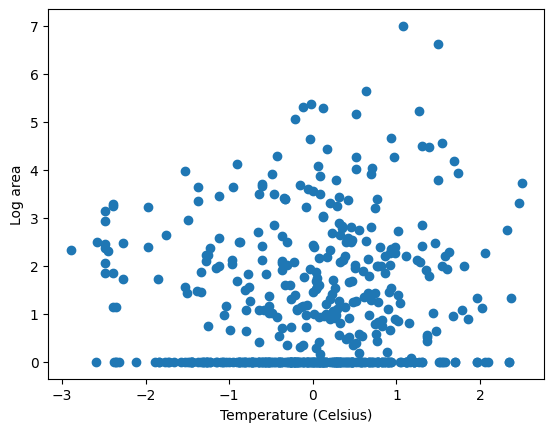

In [43]:
plt.scatter(fires_final['temp'], fires_final['log_area'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Log area')
plt.show()

In [47]:
# List of feature columns
feature_cols = [col for col in fires_final.columns if col != 'log_area']

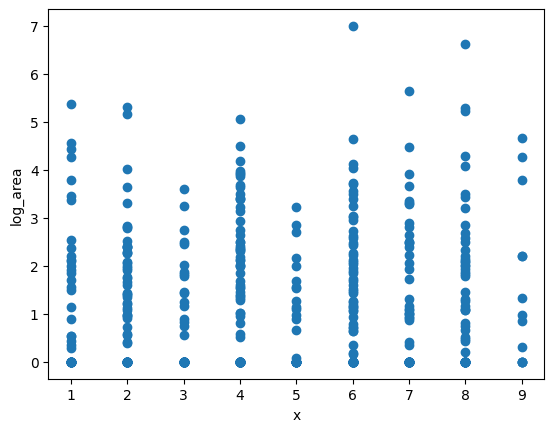

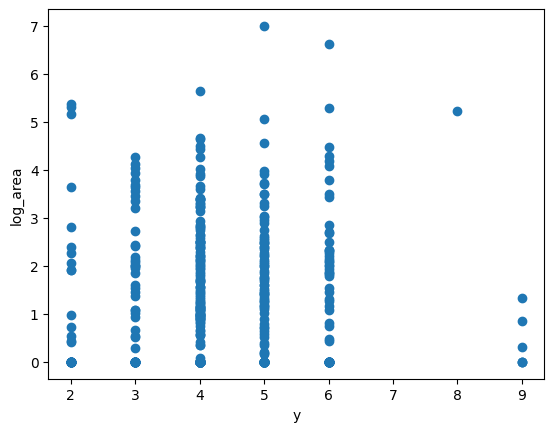

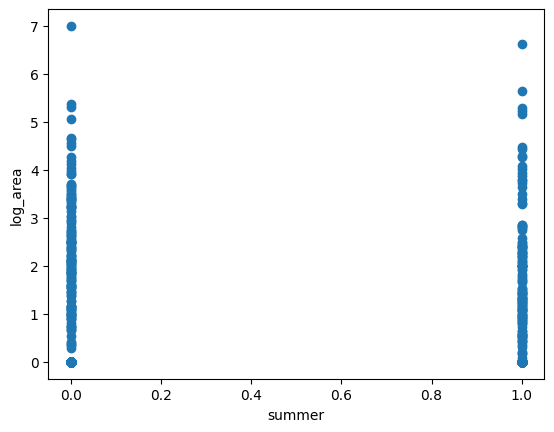

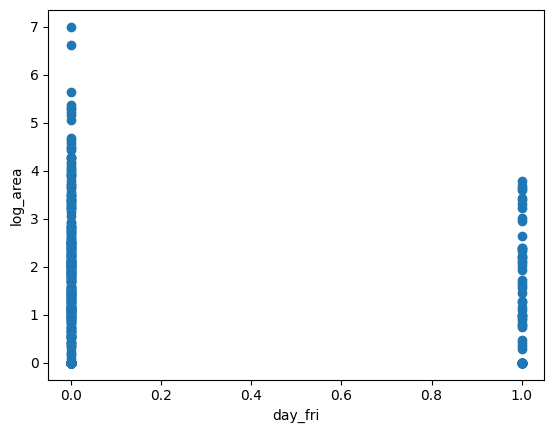

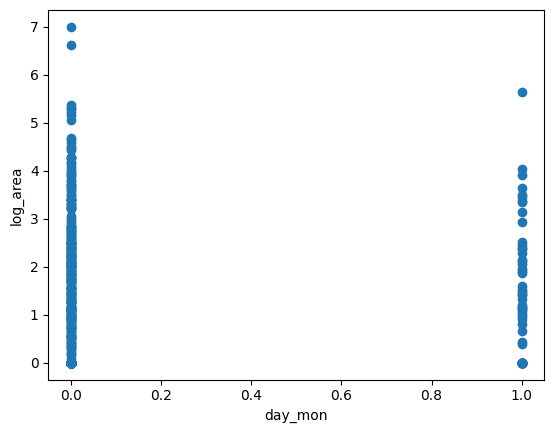

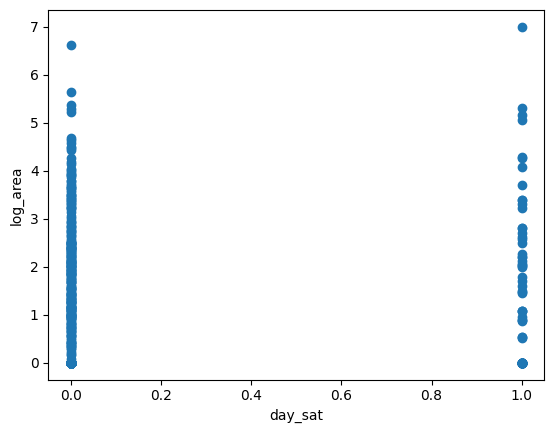

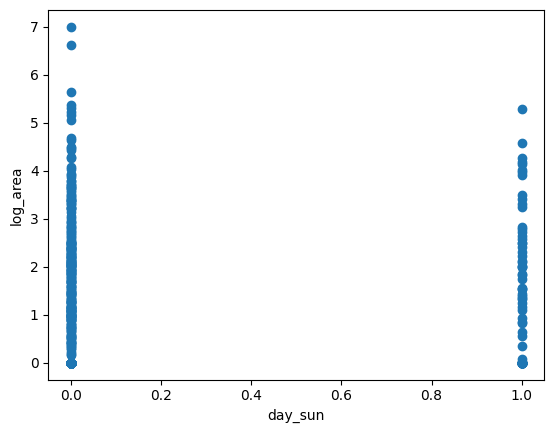

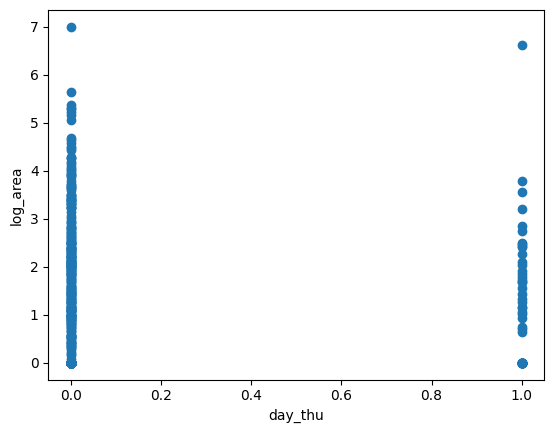

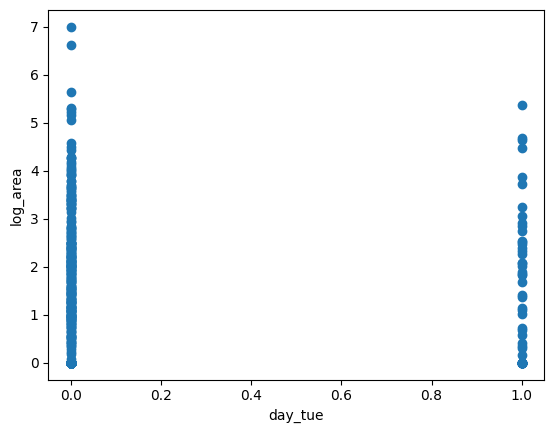

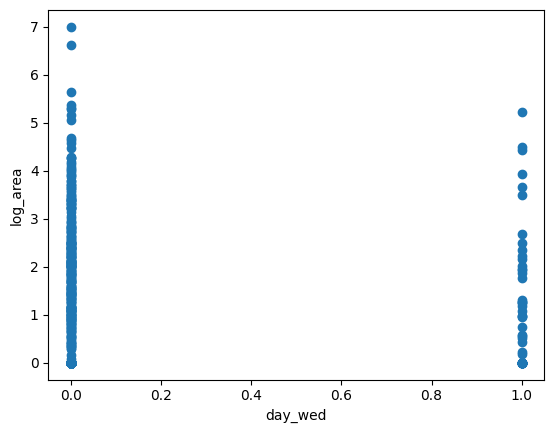

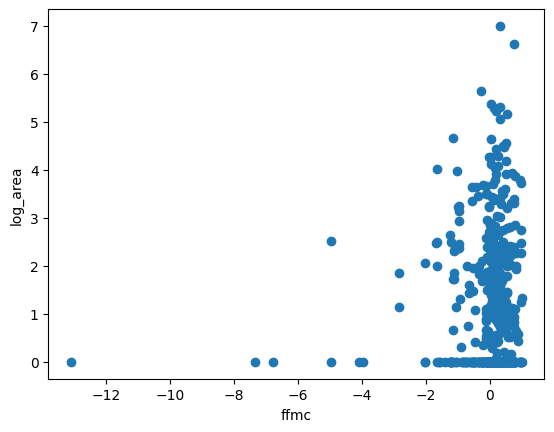

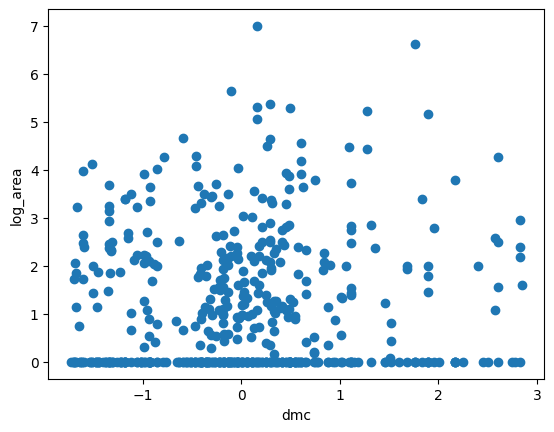

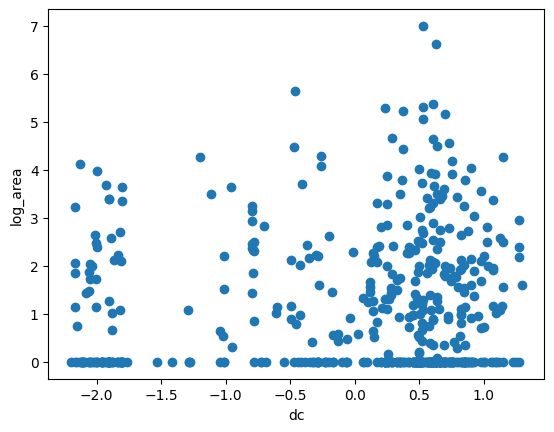

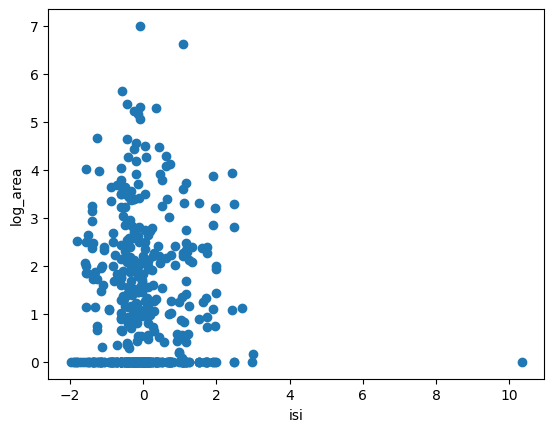

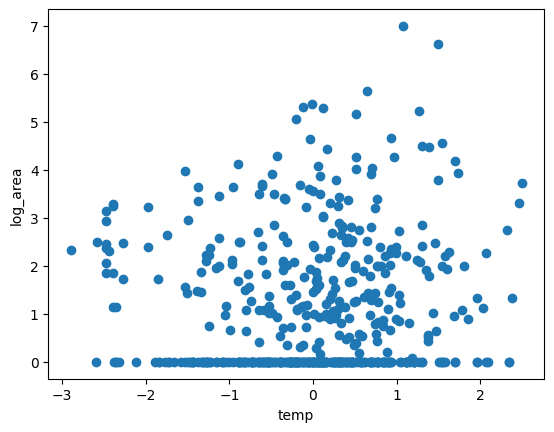

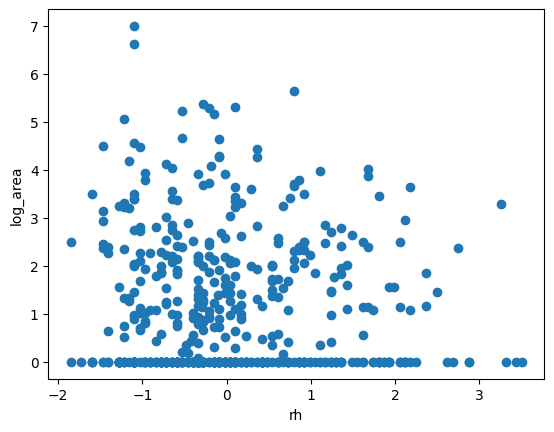

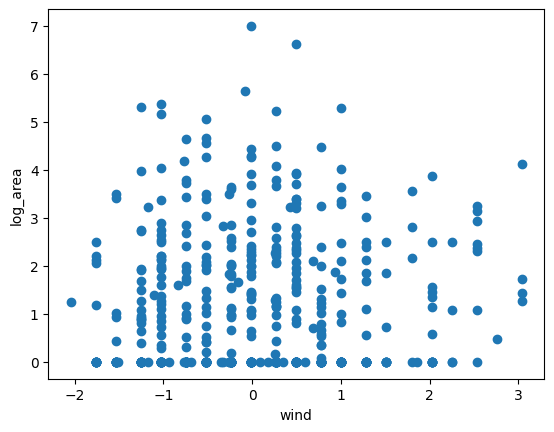

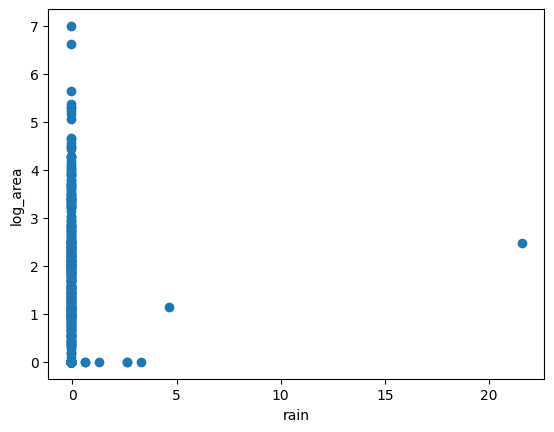

In [48]:
import matplotlib.pyplot as plt

for col in feature_cols:
    plt.scatter(fires_final[col], fires_final['log_area'])
    plt.xlabel(col)
    plt.ylabel('log_area')
    plt.show()

x
y
summer
day_fri
day_mon
day_sat
day_sun
day_thu
day_tue
day_wed
ffmc
dmc
dc
isi
temp
rh
wind
rain


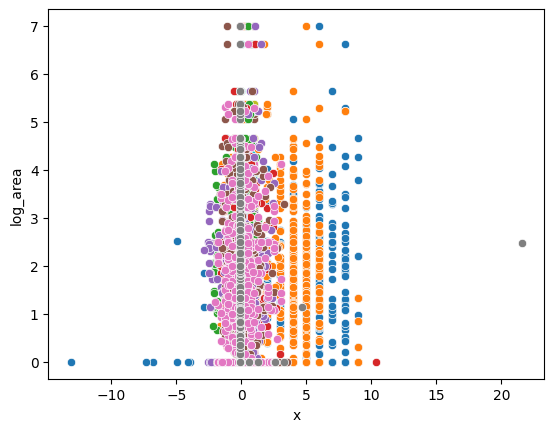

In [50]:
import seaborn as sns

# Create a list of all features except 'log_area'
feature_cols = [col for col in fires_final.columns if col != 'log_area']

# Iterate through each feature and plot its relationship with 'log_area'
for col in feature_cols:
    print(col)
    sns.scatterplot(x=col, y='log_area', data=fires_final)